In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,Sequential
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten,MaxPool2D,Activation,BatchNormalization,Dense
import matplotlib.pyplot as plt

In [187]:
# load train_test_split
from sklearn.model_selection import train_test_split
# (x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [188]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

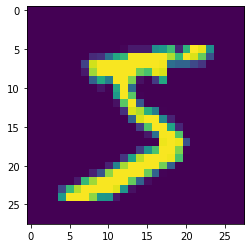

In [ ]:
# displaying first imgae form training data
plt.imshow(x_train[0]) 

In [ ]:
y_train[0] # labels of first training data is 5

5

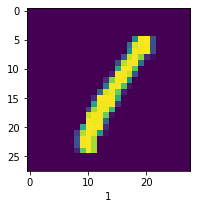

In [ ]:
def  show_Sample(x, y, index):
  plt.figure(figsize=(9,3))
  plt.imshow(x[index])
  plt.xlabel(y[index])
show_Sample(x_train,y_train,3)

In [ ]:
## before  normalizing  
x_train[0]
# the value wil be range from 0 -  255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

# CNN layers


In [213]:
cnn = models.Sequential([
    layers.Conv2D(128, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    
    # second layers
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    # third layers
    layers.Conv2D(32,(3,3),activation = 'relu'),
    layers.MaxPooling2D(2,2),
    #flatten
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    #dense
 
    #
    

]) 
cnn.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 3, 3, 32)          18464     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 1, 1, 32)       

In [220]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics =['accuracy'])

In [221]:
cnn.fit(x_train,y_train,epochs =4,validation_split=0.2, verbose = 2)

Epoch 1/4
1500/1500 - 6s - loss: 0.2913 - accuracy: 0.9097 - val_loss: 0.1170 - val_accuracy: 0.9648 - 6s/epoch - 4ms/step
Epoch 2/4
1500/1500 - 5s - loss: 0.0938 - accuracy: 0.9719 - val_loss: 0.0957 - val_accuracy: 0.9709 - 5s/epoch - 3ms/step
Epoch 3/4
1500/1500 - 5s - loss: 0.0679 - accuracy: 0.9789 - val_loss: 0.0729 - val_accuracy: 0.9781 - 5s/epoch - 4ms/step
Epoch 4/4
1500/1500 - 5s - loss: 0.0543 - accuracy: 0.9825 - val_loss: 0.0866 - val_accuracy: 0.9745 - 5s/epoch - 3ms/step


In [223]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0834 - accuracy: 0.9752


[0.08338938653469086, 0.9751999974250793]

# ***Solution1***
Normalization is required when the value difference between two or more feature are high, because the cnn algorithm give more priority to the larger value. inorder to avoid that , normalizing of training and test data is required.






In [189]:
x_train = x_train/255 
x_test = x_test/255 

In [190]:
# after normalization 
 # for first image from training  data
 # for first image from test data
x_train[0]
x_test[0]

# the value will be range form  0 - 1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Solution 2


In [191]:
#after activation function
cnn_batchNormalization_afterActivation_function = models.Sequential([
    keras.layers.Conv2D(128,(3,3), activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
#   after activation function
    keras.layers.BatchNormalization(),
    #flattenlayers
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
    
])
cnn_batchNormalization_afterActivation_function.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 3, 3, 32)          18464     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 1, 1, 32)        

In [192]:
cnn_batchNormalization_afterActivation_function.compile(optimizer ='adam', loss ='sparse_categorical_crossentropy',metrics=['accuracy'])

In [193]:
cnn_batchNormalization_afterActivation_function.fit(x_train,y_train,epochs =4,validation_split=0.2, verbose = 2)

Epoch 1/4
1500/1500 - 5s - loss: 0.1805 - accuracy: 0.9498 - val_loss: 0.0800 - val_accuracy: 0.9761 - 5s/epoch - 4ms/step
Epoch 2/4
1500/1500 - 5s - loss: 0.0714 - accuracy: 0.9777 - val_loss: 0.0964 - val_accuracy: 0.9696 - 5s/epoch - 3ms/step
Epoch 3/4
1500/1500 - 5s - loss: 0.0571 - accuracy: 0.9820 - val_loss: 0.0625 - val_accuracy: 0.9808 - 5s/epoch - 3ms/step
Epoch 4/4
1500/1500 - 5s - loss: 0.0483 - accuracy: 0.9847 - val_loss: 0.0603 - val_accuracy: 0.9825 - 5s/epoch - 4ms/step


In [194]:
cnn_batchNormalization_afterActivation_function.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0626 - accuracy: 0.9820


[0.06260433793067932, 0.9819999933242798]

In [195]:
## pritty good accuracy without using batchnormalization = 98.22% 

# Solution3


In [196]:
#solution 3
#using bathnormalization when mean = 0 and varince = 1 after hidden layers

cnn_batchNormalization = models.Sequential([
    keras.layers.Conv2D(128,(3,3), activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    #flattenlayers
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    # after hidden layer 
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10,activation='softmax')
    
])
cnn_batchNormalization.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 3, 3, 32)          18464     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 1, 1, 32)       

In [197]:
cnn_batchNormalization.compile(optimizer ='adam', loss ='sparse_categorical_crossentropy',metrics=['accuracy'])

In [198]:
cnn_batchNormalization.fit(x_train,y_train,epochs =4,validation_split=0.2, verbose = 2)

Epoch 1/4
1500/1500 - 6s - loss: 0.1692 - accuracy: 0.9534 - val_loss: 0.1303 - val_accuracy: 0.9622 - 6s/epoch - 4ms/step
Epoch 2/4
1500/1500 - 5s - loss: 0.0701 - accuracy: 0.9779 - val_loss: 0.0750 - val_accuracy: 0.9756 - 5s/epoch - 3ms/step
Epoch 3/4
1500/1500 - 5s - loss: 0.0521 - accuracy: 0.9833 - val_loss: 0.0615 - val_accuracy: 0.9822 - 5s/epoch - 3ms/step
Epoch 4/4
1500/1500 - 6s - loss: 0.0428 - accuracy: 0.9868 - val_loss: 0.0789 - val_accuracy: 0.9765 - 6s/epoch - 4ms/step


In [199]:
cnn_batchNormalization.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0852 - accuracy: 0.9742


[0.0851898342370987, 0.9742000102996826]

In [200]:
#Solution 4

# Solution 4

In [201]:
# building  layers

cnn = models.Sequential([
    layers.Conv2D(128, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    
    # second layers
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    # third layers
    layers.Conv2D(32,(3,3),activation = 'relu'),
    layers.MaxPooling2D(2,2),
    #flatten
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    #dense
 
    #
    

]) 
cnn.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 3, 3, 32)          18464     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 1, 1, 32)       

In [202]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics =['accuracy'])

# verbose = 0

In [211]:
cnn.fit(x_train,y_train,epochs =4,validation_split=0.2)

Epoch 1/4
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.0852 - val_accuracy: 0.9850
Epoch 2/4
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.1091 - val_accuracy: 0.9843
Epoch 3/4
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0090 - accuracy: 0.9973 - val_loss: 0.0923 - val_accuracy: 0.9858
Epoch 4/4
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.0821 - val_accuracy: 0.9860


In [212]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0782 - accuracy: 0.9851


[0.0782017707824707, 0.9850999712944031]

# verbose =1

In [207]:
cnn.fit(x_train,y_train,epochs =4,validation_split=0.2, verbose = 1)

Epoch 1/4
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0213 - accuracy: 0.9930 - val_loss: 0.0594 - val_accuracy: 0.9855
Epoch 2/4
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0186 - accuracy: 0.9940 - val_loss: 0.0844 - val_accuracy: 0.9758
Epoch 3/4
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0157 - accuracy: 0.9948 - val_loss: 0.0646 - val_accuracy: 0.9850
Epoch 4/4
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0146 - accuracy: 0.9950 - val_loss: 0.0753 - val_accuracy: 0.9849


In [210]:
## It gives best accuracy when verbose = 1 compare to other
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0727 - accuracy: 0.9859


[0.07266652584075928, 0.9858999848365784]

# verbose =2

In [203]:
cnn.fit(x_train,y_train,epochs =4,validation_split=0.2, verbose = 2)


Epoch 1/4
1500/1500 - 6s - loss: 0.2602 - accuracy: 0.9166 - val_loss: 0.1007 - val_accuracy: 0.9693 - 6s/epoch - 4ms/step
Epoch 2/4
1500/1500 - 5s - loss: 0.0883 - accuracy: 0.9729 - val_loss: 0.0755 - val_accuracy: 0.9772 - 5s/epoch - 4ms/step
Epoch 3/4
1500/1500 - 5s - loss: 0.0630 - accuracy: 0.9806 - val_loss: 0.0591 - val_accuracy: 0.9831 - 5s/epoch - 3ms/step
Epoch 4/4
1500/1500 - 5s - loss: 0.0504 - accuracy: 0.9842 - val_loss: 0.0649 - val_accuracy: 0.9818 - 5s/epoch - 4ms/step


In [204]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0676 - accuracy: 0.9805


[0.06764506548643112, 0.9804999828338623]

In [205]:
## better accuracy  = 98.51%